**Keras neural network solution attempt :)**

In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


**Setting seed value**

In [164]:
seed_value= 666

os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)



2022-08-31 17:57:11.433365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 17:57:11.434375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 17:57:11.434982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 17:57:11.435953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 17:57:11.436700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [165]:
df_train = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv').set_index('id')
df_train

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


In [166]:
df_train.isna().sum()

product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [167]:
# sns.distplot(df_train['loading'])

In [168]:
# feature_list = ['loading', 'measurement_0', 'measurement_1', 'measurement_2', 'measurement_15', 'measurement_16', 'measurement_17', 'failure']
# df_train = df_train[feature_list]

# df_train['loading'] = np.log(df_train['loading'])
# sns.distplot(df_train['loading'])

In [169]:
from sklearn.neighbors import KNeighborsRegressor

def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

na_cols = [col for col in df_train.columns if df_train[col].isnull().sum()!=0]

for col in na_cols:  
    df_train = knn_impute(df_train, col)

In [170]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26570 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26570 non-null  float64
 10  measurement_4   26570 non-null  float64
 11  measurement_5   26570 non-null  float64
 12  measurement_6   26570 non-null  float64
 13  measurement_7   26570 non-null  float64
 14  measurement_8   26570 non-null  float64
 15  measurement_9   26570 non-null  float64
 16  measurement_10  26570 non-null  float64
 17  measurement_11  26570 non-null 

In [171]:
X = df_train.copy()
y = X.pop("failure")

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

**Preprocessing is here:**

In [172]:

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer1',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False)),
#     ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False)),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [173]:
X_train_tr = preprocessor.fit_transform(X_train, y_train)
X_valid_tr = preprocessor.transform(X_valid)

In [174]:
X_train_tr.shape

(21256, 31)

**Here is my neural network**

In [175]:

model = keras.Sequential([
#     layers.Dense(1024, input_shape=[262]),
#     layers.LeakyReLU(alpha=0.3),
#     layers.Dropout(rate=0.1),
    layers.Dense(512, input_shape=[31]),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=0.1),
    layers.Dense(256), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=0.1),
    layers.Dense(128),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=0.1),
    layers.Dense(64),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=0.1),
    layers.Dense(32),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=0.1),
    layers.Dense(16),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=0.1),
    layers.Dense(8),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=0.1),
    layers.Dense(4),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=0.1),
    layers.Dense(2),
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(1, activation='sigmoid'),
])

**You can try different optimizers here:**

In [176]:
opt = keras.optimizers.Adam(learning_rate=0.001)
# opt = keras.optimizers.Adamax(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
#     metrics=[tf.keras.metrics.AUC(name='auc')],
    metrics=['binary_accuracy'],
)

In [177]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train_tr, y_train,
    validation_data=(X_valid_tr, y_valid),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/100
84/84 [==============================] - 2s 9ms/step - loss: 0.5532 - auc: 0.5026 - val_loss: 0.5206 - val_auc: 0.5278
Epoch 2/100
84/84 [==============================] - 0s 5ms/step - loss: 0.5328 - auc: 0.5086 - val_loss: 0.5273 - val_auc: 0.5549
Epoch 3/100
84/84 [==============================] - 0s 5ms/step - loss: 0.5272 - auc: 0.5187 - val_loss: 0.5072 - val_auc: 0.5606
Epoch 4/100
84/84 [==============================] - 0s 5ms/step - loss: 0.5237 - auc: 0.5270 - val_loss: 0.5053 - val_auc: 0.5747
Epoch 5/100
84/84 [==============================] - 0s 5ms/step - loss: 0.5216 - auc: 0.5344 - val_loss: 0.5060 - val_auc: 0.5842
Epoch 6/100
84/84 [==============================] - 0s 5ms/step - loss: 0.5189 - auc: 0.5480 - val_loss: 0.5030 - val_auc: 0.5866
Epoch 7/100
84/84 [==============================] - 0s 5ms/step - loss: 0.5210 - auc: 0.5327 - val_loss: 0.5032 - val_auc: 0.5862
Epoch 8/100
84/84 [==============================] - 0s 5ms/step - loss: 0.5184 - a

<AxesSubplot:>

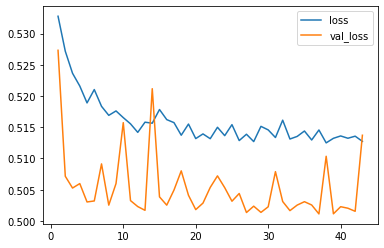

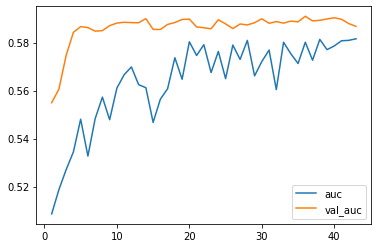

In [178]:
history_df = pd.DataFrame(history.history)

history_df.loc[1:, ['loss', 'val_loss']].plot()
# history_df.loc[1:, ['auc', 'val_auc']].plot()

In [179]:
X_tr = preprocessor.fit_transform(X, y)
history = model.fit(
    X_tr, y,
    validation_data=(X_valid_tr, y_valid),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/100
104/104 [==============================] - 1s 5ms/step - loss: 0.5141 - auc: 0.5616 - val_loss: 0.5035 - val_auc: 0.5871
Epoch 2/100
104/104 [==============================] - 0s 4ms/step - loss: 0.5128 - auc: 0.5655 - val_loss: 0.5051 - val_auc: 0.5920
Epoch 3/100
104/104 [==============================] - 0s 4ms/step - loss: 0.5123 - auc: 0.5703 - val_loss: 0.5030 - val_auc: 0.5913
Epoch 4/100
104/104 [==============================] - 1s 5ms/step - loss: 0.5127 - auc: 0.5707 - val_loss: 0.5061 - val_auc: 0.5927
Epoch 5/100
104/104 [==============================] - 1s 8ms/step - loss: 0.5124 - auc: 0.5718 - val_loss: 0.5020 - val_auc: 0.5951
Epoch 6/100
104/104 [==============================] - 1s 7ms/step - loss: 0.5138 - auc: 0.5596 - val_loss: 0.5032 - val_auc: 0.5917
Epoch 7/100
104/104 [==============================] - 1s 5ms/step - loss: 0.5126 - auc: 0.5726 - val_loss: 0.5044 - val_auc: 0.5891
Epoch 8/100
104/104 [==============================] - 0s 5ms/step - 

<AxesSubplot:>

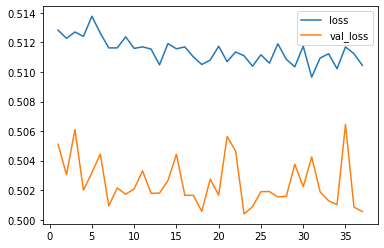

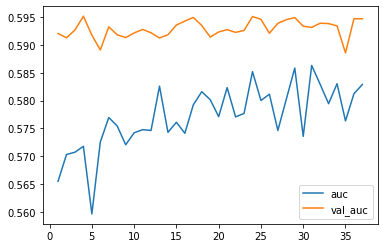

In [180]:
history_df = pd.DataFrame(history.history)

history_df.loc[1:, ['loss', 'val_loss']].plot()
# history_df.loc[1:, ['auc', 'val_auc']].plot()

In [181]:
df_test = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv').set_index('id')
df_test

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,I,144.74,material_7,material_5,9,5,0,4,9,18.465,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
47341,I,74.53,material_7,material_5,9,5,4,8,7,18.900,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
47342,I,67.73,material_7,material_5,9,5,10,11,2,18.656,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349


In [182]:
# feature_list_test = ['loading', 'measurement_0', 'measurement_1', 'measurement_2', 'measurement_15', 'measurement_16', 'measurement_17']
# df_test = df_test[feature_list_test]

# df_test['loading'] = np.log(df_test['loading'])

In [183]:
na_cols = [col for col in df_test.columns if df_test[col].isnull().sum()!=0]

for col in na_cols:  
    df_test = knn_impute(df_test, col)

In [184]:
X_test_tr = preprocessor.transform(df_test)

**Model prediction**

In [185]:
prob = model.predict(X_test_tr)
prob

array([[0.21949527],
       [0.17351072],
       [0.1959896 ],
       ...,
       [0.15807304],
       [0.22615743],
       [0.18409747]], dtype=float32)

In [186]:
df_subb = pd.read_csv('../input/tabular-playground-series-aug-2022/sample_submission.csv')
df_subb

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,0.0
...,...,...
20770,47340,0.0
20771,47341,0.0
20772,47342,0.0
20773,47343,0.0


In [187]:
df_subb.failure = prob
df_subb

,id,failure
0,26570,0.219495
1,26571,0.173511
2,26572,0.195990
3,26573,0.210161
4,26574,0.321431
...,...,...
20770,47340,0.232730
20771,47341,0.178232
20772,47342,0.158073
20773,47343,0.226157


In [188]:
df_subb.to_csv('submission.csv', index = None)

**Saving solution**

In [189]:
df = pd.read_csv('submission.csv')
df

,id,failure
0,26570,0.219495
1,26571,0.173511
2,26572,0.195990
3,26573,0.210161
4,26574,0.321431
...,...,...
20770,47340,0.232730
20771,47341,0.178232
20772,47342,0.158073
20773,47343,0.226157
